# Regression

The goal of this homework is to create a regression model for prediction apartment prices (column 'price').

### EDA
Load the data.

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('AB_NYC_2019.csv')
df.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365


<AxesSubplot:>

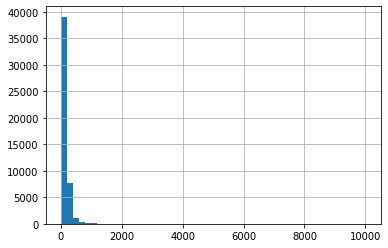

In [3]:
# Look at the price variable. Does it have a long tail?
df['price'].hist(bins=50)

The data has a long tail. Probably log is better (actually log(x+1) because there is a zero.

<AxesSubplot:>

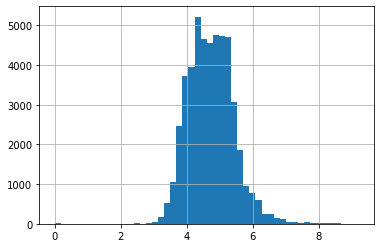

In [4]:
np.log1p(df['price']).hist(bins=50)

### Select Columns

In [5]:
y = df['price']
X = df[['latitude', 'longitude',
         'minimum_nights', 'number_of_reviews', 'reviews_per_month',
         'calculated_host_listings_count', 'availability_365']]

In [6]:
X.shape, y.shape

((48895, 7), (48895,))

In [7]:
X.head()

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,40.64749,-73.97237,1,9,0.21,6,365
1,40.75362,-73.98377,1,45,0.38,2,355
2,40.80902,-73.94190,3,0,NaN,1,365
3,40.68514,-73.95976,1,270,4.64,1,194
4,40.79851,-73.94399,10,9,0.10,1,0


### Question 1

Find a feature with missing values. How many missing values does it have?

In [8]:
X.isna().sum()

latitude                              0
longitude                             0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

### Question 2
What's the median (50% percentile) for variable 'minimum_nights'?

In [9]:
df['minimum_nights'].median()

3.0

Split the data

In [10]:
# Apply the log transformation to the price variable using the np.log1p() function.
y = np.log1p(y)

In [11]:
def train_val_test_split(X, y, seed=42):
    # Shuffle the initial dataset, use seed 42.
    # Split your data in train/val/test sets, with 60%/20%/20% distribution.
    idx = np.arange(X.shape[0])
    np.random.seed(seed)
    np.random.shuffle(idx)
    
    Xtrain = X.iloc[idx[:29337]]
    Xval = X.iloc[idx[29337:29337+9779]]
    Xtest = X.iloc[idx[29337+9779:]]

    ytrain = y.iloc[idx[:29337]]
    yval = y.iloc[idx[29337:29337+9779]]
    ytest = y.iloc[idx[29337+9779:]]  
    
    return Xtrain, Xval, Xtest, ytrain, yval, ytest

In [12]:
# Make sure that the target value ('price') is not in your dataframe.
assert 'price' not in X

### Question 3

* We need to deal with missing values for the column from Q1.
* We have two options: fill it with 0 or with the mean of this variable.
* Try both options. For each, train a linear regression model without regularization using the code from the lesssons.
* For computing the mean, use the training only!
* Compare the RMSE of each option.
* Round the RMSE scores to 2 decimal digits using round(score, 2)
* Which option gives better RMSE?

In [13]:
def rmse(ypred, ytrue):
    diff = ypred - ytrue
    sq = diff ** 2
    mean = np.mean(sq)
    return np.sqrt(mean)

In [14]:
def train_linear(Xtrain, Xval, ytrain, yval):
    m = LinearRegression()
    m.fit(Xtrain, ytrain)
    
    ytrain_pred = m.predict(Xtrain)
    yval_pred = m.predict(Xval)
    
    rmse_train = rmse(ytrain, ytrain_pred)
    rmse_val = rmse(yval, yval_pred)
    
    return m, rmse_train, rmse_val

In [15]:
Xtrain, Xval, Xtest, ytrain, yval, ytest = train_val_test_split(X, y)

In [16]:
# option 1: fill with 0
Xtrain0 = Xtrain.copy()
Xtrain0['reviews_per_month'].fillna(0, inplace=True)

In [17]:
Xval0 = Xval.copy()
Xval0['reviews_per_month'].fillna(0, inplace=True)

<AxesSubplot:>

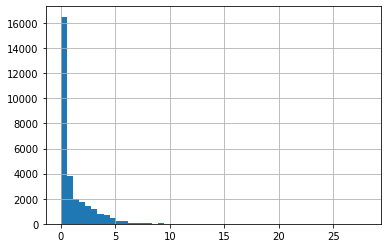

In [18]:
Xtrain0['reviews_per_month'].hist(bins=50)

In [19]:
m, sctr, scval = train_linear(Xtrain0, Xval0, ytrain, yval)
f'train: {sctr:8.4f}     val: {scval:8.4f}'

'train:   0.6429     val:   0.6430'

<AxesSubplot:>

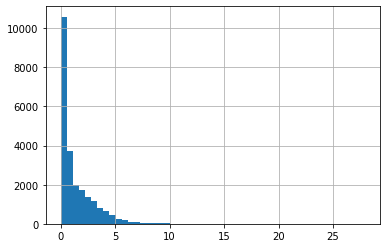

In [20]:
Xtrain['reviews_per_month'].hist(bins=50)

In [21]:
# option 2: fill with mean
Xtrain_mean = Xtrain.copy()
mean = Xtrain_mean['reviews_per_month'].mean()
Xtrain_mean['reviews_per_month'].fillna(mean, inplace=True)

In [22]:
Xval_mean = Xval.copy()
Xval_mean['reviews_per_month'].fillna(mean, inplace=True)

<AxesSubplot:>

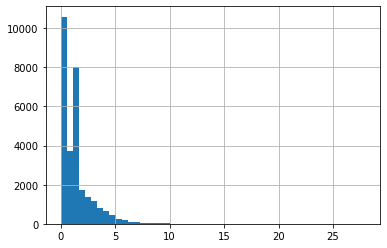

In [23]:
Xtrain_mean['reviews_per_month'].hist(bins=50)

In [24]:
m, sctr, scval = train_linear(Xtrain_mean, Xval_mean, ytrain, yval)
f'train: {sctr:8.4f}     val: {scval:8.4f}'

'train:   0.6429     val:   0.6428'

### Question 4

* Now let's train a regularized linear regression.
* For this question, fill the NAs with 0.
* Try different values of r from this list: [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10].
* Round the RMSE scores to 2 decimal digits.
* Which r gives the best RMSE?

In [25]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
Xtrain0 = scaler.fit_transform(Xtrain0)
Xval0 = scaler.transform(Xval0)

In [26]:
r = [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10, 1000000000]
for alpha in r:
    m = Ridge(alpha=alpha)
    m.fit(Xtrain0, ytrain)
    
    ytrain_pred = m.predict(Xtrain0)
    rmse_train = rmse(ytrain, ytrain_pred)
    
    yval_pred = m.predict(Xval0)
    rmse_val = rmse(yval, yval_pred)
    
    print(f"{alpha:10.7f} {rmse_train:8.3f}   {rmse_val:8.3f}")

 0.0000000    0.643      0.643
 0.0000010    0.643      0.643
 0.0001000    0.643      0.643
 0.0010000    0.643      0.643
 0.0100000    0.643      0.643
 0.1000000    0.643      0.643
 1.0000000    0.643      0.643
 5.0000000    0.643      0.643
10.0000000    0.643      0.643
1000000000.0000000    0.693      0.694


### Question 5

We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
For each seed, do the train/validation/test split with 60%/20%/20% distribution.

Fill the missing values with 0 and train a model without regularization.
For each seed, collect the RMSE scores.
What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
Round the result to 3 decimal digits (round(std, 3))

In [27]:
train_scores = []
val_scores = []

for seed in range(10):
    Xtrain, Xval, Xtest, ytrain, yval, ytest = train_val_test_split(X, y,seed=seed)
    
    Xtrain0 = Xtrain.copy()
    Xtrain0['reviews_per_month'].fillna(0, inplace=True)
    
    Xval0 = Xval.copy()
    Xval0['reviews_per_month'].fillna(0, inplace=True)

    m, sctr, scval = train_linear(Xtrain0, Xval0, ytrain, yval)
    train_scores.append(sctr)
    val_scores.append(scval)

In [28]:
np.mean(train_scores).round(3), np.mean(val_scores).round(3)

(0.646, 0.643)

In [29]:
np.std(train_scores).round(3), np.std(val_scores).round(3)

(0.004, 0.008)

### Question 6

* Split the dataset like previously, use seed 9.
* Combine train and validation datasets.
* Train a model with r=0.001.
* What's the RMSE on test dataset?

In [30]:
Xtrain, Xval, Xtest, ytrain, yval, ytest = train_val_test_split(X, y,seed=9)

In [31]:
Xtrain = Xtrain.copy()
Xtrain['reviews_per_month'].fillna(0, inplace=True)

Xval = Xval.copy()
Xval['reviews_per_month'].fillna(0, inplace=True)

Xtest = Xtest.copy()
Xtest['reviews_per_month'].fillna(0, inplace=True)

In [32]:
Xtr = np.vstack([Xtrain, Xval])
Xtrain.shape, Xval.shape, Xtr.shape

((29337, 7), (9779, 7), (39116, 7))

In [33]:
ytr = np.hstack([ytrain, yval])
ytrain.shape, yval.shape, ytr.shape

((29337,), (9779,), (39116,))

In [34]:
scaler = MinMaxScaler()
Xtrain_sc = scaler.fit_transform(Xtr)
Xtest_sc = scaler.transform(Xtest)

In [35]:
m = Ridge(alpha=0.001)
m.fit(Xtrain_sc, ytr)

Ridge(alpha=0.001)

In [36]:
ytrain_pred = m.predict(Xtrain_sc)
round(rmse(ytr, ytrain_pred), 4)

0.6451

In [37]:
ytest_pred = m.predict(Xtest_sc)
round(rmse(ytest, ytest_pred), 4)

0.645

In [38]:
s = pd.Series(m.coef_, index=['latitude', 'longitude',
         'minimum_nights', 'number_of_reviews', 'reviews_per_month',
         'calculated_host_listings_count', 'availability_365'])

<AxesSubplot:>

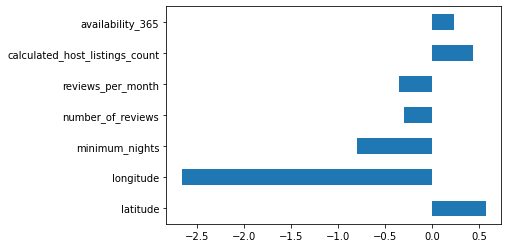

In [39]:
s.plot.barh()